## Homework 3

Yuan Feng

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
inc = pd.read_csv("malaria_inc.csv")
dth = pd.read_csv("malaria_deaths.csv")
age = pd.read_csv("malaria_deaths_age.csv")

In [10]:
#!pip install pyecharts==0.5.10
#!pip install echarts-countries-pypkg
#!pip3 install pyecharts-snapshot

## Plot 1  Avg. Malaria Deaths per 100,000 people (1990-2016)

In [175]:
from pyecharts import Map
dth2 = dth.set_axis(['Entity', 'Code', 'Year', 'Deaths'], axis=1, inplace=False)
dth2= dth2.groupby(by='Code').agg({'Entity': 'max',
                              'Deaths': 'sum'})
attr = dth2["Entity"]
dth2["Deaths"] = dth2["Deaths"]/27
value= dth2["Deaths"]
map0 = Map("Avg. Malaria Deaths per 100,000 people (1990-2016)", width=970, height=400)
map0.add("Number", attr, value, maptype="world",  is_map_symbol_show = False,is_visualmap=True, visual_text_color='#000')
map0.render(path="plot2.html")

In [179]:
age["age_group"].unique()

array(['Under 5', '70 or older', '5-14', '15-49', '50-69'], dtype=object)

In [186]:
age = age.astype({"age_group":'category'})age2= age.groupby(by='age_group').agg({'deaths': 'sum'})


,deaths
age_group,
15-49,8.462569e+06
5-14,1.026816e+07
50-69,4.840002e+06
70 or older,3.003205e+06
Under 5,8.726745e+07


In [192]:
age2["Groups"] = ["15-49", "5-14","50-69","70+","under 5"]
age2

,deaths,Groups
age_group,,
15-49,8.462569e+06,15-49
5-14,1.026816e+07,5-14
50-69,4.840002e+06,50-69
70 or older,3.003205e+06,70+
Under 5,8.726745e+07,under 5


##  Plot 2 Number of Worldwide Malaria Deaths categorized by Age (1990-2016)

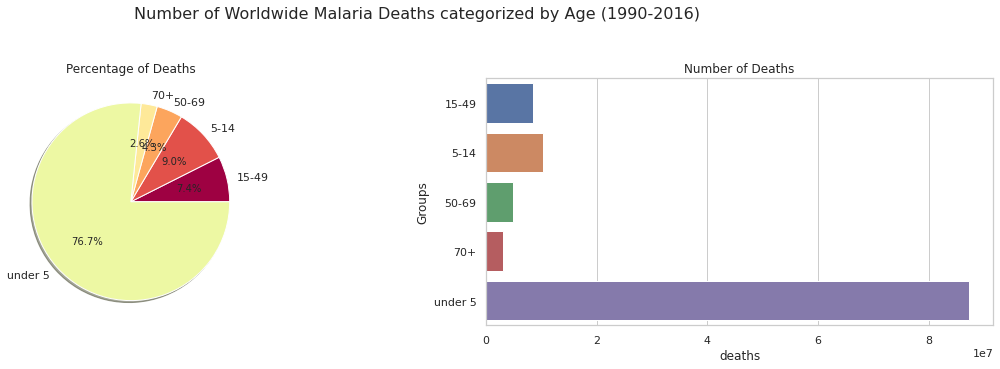

In [227]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

source_labels = age2["Groups"]
source_counts = age2["deaths"]

plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 0], aspect=1, title='Percentage of Deaths')

first = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)



plt.subplot(the_grid[0, 1], title='Number of Deaths')

sns.barplot(x='deaths',y='Groups', data=age2)


plt.suptitle('Number of Worldwide Malaria Deaths categorized by Age (1990-2016)', fontsize=16)


plt.show()


## Plot 3 Number of Top 10 Countries with most Malaria Deaths (1990-2016)

In [249]:
#age3 = age.set_axis(['Entity', 'Code', 'Year', 'Deaths'], axis=1, inplace=False)
age3= age.groupby(by='code').agg({'entity': 'max',
                              'deaths': 'sum'})
age3

,entity,deaths
code,,
AFG,Afghanistan,39876.472958
AGO,Angola,194739.166863
ALB,Albania,0.000000
AND,Andorra,0.000000
ARE,United Arab Emirates,12.852339
...,...,...
WSM,Samoa,0.000000
YEM,Yemen,157.859831
ZAF,South Africa,5846.502856


In [253]:
age3 = age3.sort_values(by=['deaths'], ascending=False)
age3.head(11)

,entity,deaths
code,,
OWID_WRL,World,2.329629e+07
NGA,Nigeria,6.781688e+06
COD,Democratic Republic of Congo,2.626521e+06
IND,India,1.635914e+06
UGA,Uganda,1.385068e+06
BFA,Burkina Faso,8.715024e+05
TZA,Tanzania,8.404095e+05
MOZ,Mozambique,8.156913e+05
CIV,Cote d'Ivoire,7.435324e+05


In [259]:
age5 = age3[12:]
age5

,entity,deaths
code,,
GHA,Ghana,563873.874081
MWI,Malawi,437269.412630
GIN,Guinea,358865.933431
BDI,Burundi,321067.054952
SLE,Sierra Leone,295737.357472
...,...,...
BIH,Bosnia and Herzegovina,0.000000
NZL,New Zealand,0.000000
JPN,Japan,0.000000


In [260]:
sum(age5["deaths"])

5595051.916473632

In [262]:
age4 = age3[0:12]
age4["deaths"][0] = 5595051.916473632
age4

,entity,deaths
code,,
OWID_WRL,World,5.595052e+06
NGA,Nigeria,6.781688e+06
COD,Democratic Republic of Congo,2.626521e+06
IND,India,1.635914e+06
UGA,Uganda,1.385068e+06
BFA,Burkina Faso,8.715024e+05
TZA,Tanzania,8.404095e+05
MOZ,Mozambique,8.156913e+05
CIV,Cote d'Ivoire,7.435324e+05


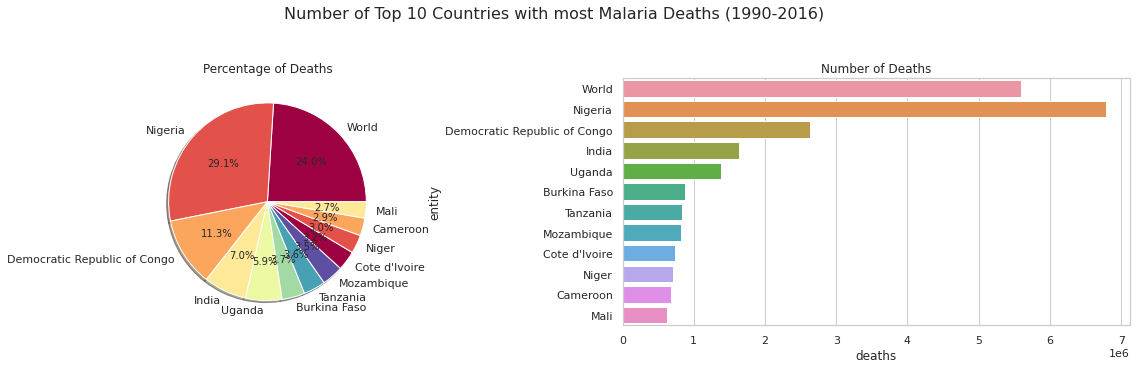

In [263]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

source_labels = age4["entity"]
source_counts = age4["deaths"]

plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 0], aspect=1, title='Percentage of Deaths')

first2 = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)



plt.subplot(the_grid[0, 1], title='Number of Deaths')

sns.barplot(x='deaths',y='entity', data=age4)


plt.suptitle('Number of Top 10 Countries with most Malaria Deaths (1990-2016)', fontsize=16)


plt.show()